In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from decimal import Decimal

 $$\epsilon = (1 + 0.4759v)^3$$
 
 $$c_s = c/\sqrt{\epsilon}$$
 
 $$ \epsilon = c^2/c_s^2 $$
 
 $$ c^2/c_s^2 = (1 + 0.4759v)^3 $$
 
 $$ c_s = c(1 + 0.4759v)^{-3/2}    $$
 
 $$ v = \rho/0.9167  $$
 
 $$ c_s = c(1 + (0.4759\rho)/0.9167)^{-3/2} $$
 
 $$ c_s = c(1 + 0.5194\rho)^{-3/2} $$

/home/robbie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


slope:0.0008362595529231412
snow factor: 0.0018137766594725057


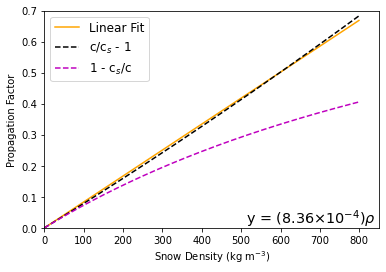

In [4]:
c = 299792458

def cs(rho):
    cs = c*     (1+(0.5191*(rho/1000)))**(-3/2)
    return(cs)

xlist = np.arange(0,800,1)
x_col =  xlist[:,np.newaxis]

ylist = np.array([(c/cs(rho)) - 1 for rho in xlist])

plt.figure(figsize=(6,4))

stats = np.linalg.lstsq(x_col,ylist)

plt.plot(xlist,xlist*stats[0][0], label = 'Linear Fit',color='orange')
plt.plot(xlist,ylist,label= r'c/c$_s$ - 1',linestyle='--', color = 'k')


y_dash_list = [1- (cs(rho)/c) for rho in xlist]


plt.plot(xlist,y_dash_list,label=r'1 - c$_s$/c',linestyle='--',color='m')

plt.xlabel('Snow Density (kg m$^{-3}$)')
plt.ylabel('Propagation Factor')
plt.ylim(0,0.7)
plt.xlim(0,850)
plt.legend(fontsize='large')

slope = stats[0][0]

slope_str = r'8.36$\times10^{-4}$'



plt.annotate(fr'y = ({slope_str})$\rho$', xy = (0.99,0.02),xycoords='axes fraction',fontsize='x-large', ha='right')


plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/SnowModel-LG_Paper/Sup_Figs/Linear_propagation.png',dpi=500,bbox_to_inches='tight')

print(f'slope:{slope}')
print(f'snow factor: {slope + (1/1023)}')

plt.show()

$$ c^2/c_s^2 = (1 + 0.4759v)^3 $$
 
$$ c/c_s = (1 + 0.4759v)^{3/2} $$
  
$$ c/c_s = (1 + 0.5194\rho)^{3/2} $$

